In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('olympics2024.csv')

In [20]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


(None,
    Rank        Country Country Code  Gold  Silver  Bronze  Total
 0     1  United States           US    40      44      42    126
 1     2          China          CHN    40      27      24     91
 2     3          Japan          JPN    20      12      13     45
 3     4      Australia          AUS    18      19      16     53
 4     5         France          FRA    16      26      22     64)

In [21]:
df['Gold_percent'] = df['Gold'] / df['Total'] * 100

In [22]:
def categorize_performance(gold_percent):
    if gold_percent > 40:
        return 'Gold Dominant'
    elif 30 <= gold_percent <= 40:
        return 'Balanced'
    else:
        return 'Bronze/Silver Heavy'

In [23]:
df['Category'] = df['Gold_percent'].apply(categorize_performance)

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Total', ylabel='Gold'>

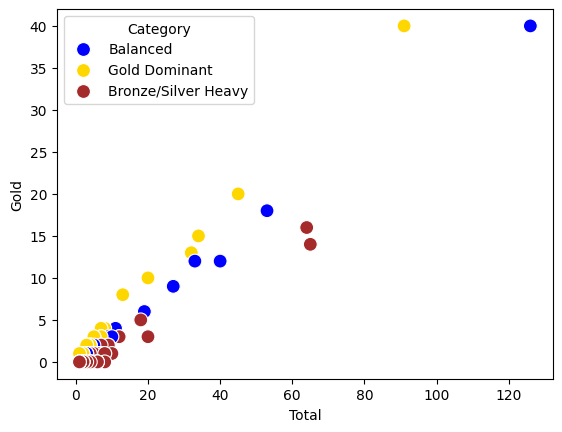

In [25]:
plt.Figure(figsize=(10, 6))
sns.scatterplot(x=df['Total'], y=df['Gold'], hue=df['Category'], s = 100, palette={'Gold Dominant':'gold', 'Balanced':'blue', 'Bronze/Silver Heavy':'brown'})

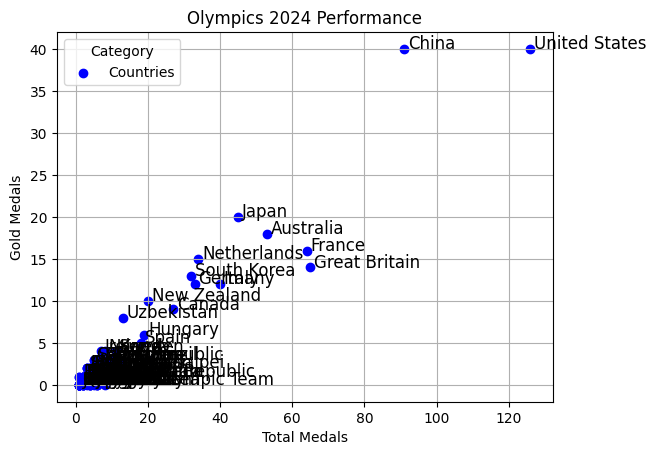

In [26]:
plt.scatter(df['Total'], df['Gold'], label='Countries', color='blue')

for i in range(len(df)):
    plt.text(df['Total'][i] + 1, df['Gold'][i], df['Country'][i], fontsize = 12)

plt.title('Olympics 2024 Performance')
plt.xlabel('Total Medals')
plt.ylabel('Gold Medals')

plt.legend(title='Category')
plt.grid(True)
plt.show()

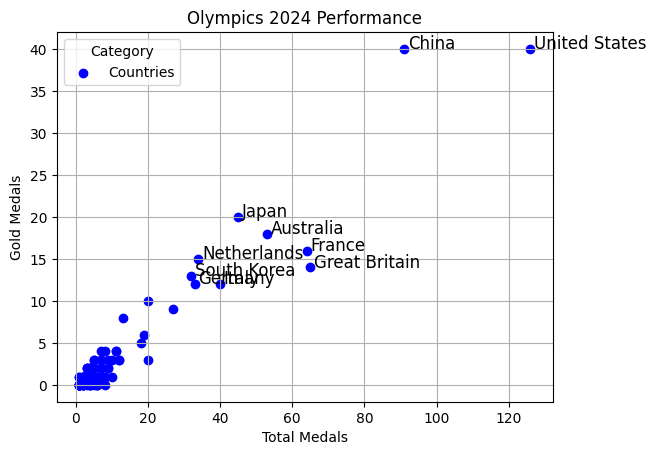

In [27]:
top_countries = df.nlargest(10, 'Total')

plt.scatter(df['Total'], df['Gold'], label='Countries', color='blue')

for i in range(len(df)):
    if df.iloc[i]['Country'] in top_countries['Country'].values:
        plt.text(df['Total'][i] + 1, df['Gold'][i], df['Country'][i], fontsize=12)


plt.title('Olympics 2024 Performance')
plt.xlabel('Total Medals')
plt.ylabel('Gold Medals')

plt.legend(title='Category')
plt.grid(True)
plt.show()

In [28]:
print(df[['Country', 'Gold', 'Total', 'Category']])

          Country  Gold  Total             Category
0   United States    40    126             Balanced
1           China    40     91        Gold Dominant
2           Japan    20     45        Gold Dominant
3       Australia    18     53             Balanced
4          France    16     64  Bronze/Silver Heavy
..            ...   ...    ...                  ...
86           Peru     0      1  Bronze/Silver Heavy
87          Qatar     0      1  Bronze/Silver Heavy
88      Singapore     0      1  Bronze/Silver Heavy
89       Slovakia     0      1  Bronze/Silver Heavy
90         Zambia     0      1  Bronze/Silver Heavy

[91 rows x 4 columns]
